In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/training.csv')
df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,...,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,...,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,...,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,...,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


In [ ]:
df.set_index('RefId', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72983 entries, 1 to 73014
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           72983 non-null  int64  
 1   PurchDate                          72983 non-null  object 
 2   Auction                            72983 non-null  object 
 3   VehYear                            72983 non-null  int64  
 4   VehicleAge                         72983 non-null  int64  
 5   Make                               72983 non-null  object 
 6   Model                              72983 non-null  object 
 7   Trim                               70623 non-null  object 
 8   SubModel                           72975 non-null  object 
 9   Color                              72975 non-null  object 
 10  Transmission                       72974 non-null  object 
 11  WheelTypeID                        69814 non-null  float64


In [ ]:
# Check unique values in the column
unique_values = df['IsBadBuy'].unique()
print(f"Unique values in 'IsBadBuy': {unique_values}")

# Ensure the column only contains 0 and 1
if set(unique_values).issubset({0, 1}):
    # Convert the column to integer (0 or 1)
    df['IsBadBuy'] = df['IsBadBuy'].astype('category')
else:
    print("The 'IsBadBuy' column contains values other than 0 and 1.")

# Verify the conversion
print(df['IsBadBuy'].dtypes)

Unique values in 'IsBadBuy': [0 1]
category


In [ ]:
# Check unique values in the column
unique_values = df['IsOnlineSale'].unique()
print(f"Unique values in 'IsOnlineSale': {unique_values}")

# Ensure the column only contains 0 and 1
if set(unique_values).issubset({0, 1}):
    # Convert the column to integer (0 or 1)
    df['IsOnlineSale'] = df['IsOnlineSale'].astype('category')
else:
    print("The 'IsOnlineSale' column contains values other than 0 and 1.")

# Verify the conversion
print(df['IsOnlineSale'].dtypes)

Unique values in 'IsOnlineSale': [0 1]
category


In [ ]:
# Rename the variable
df['Transmission'] = df['Transmission'].replace('Manual', 'MANUAL')

# Check the unique values to confirm the changes
print(df['Transmission'].unique())

['AUTO' 'MANUAL' nan]


In [ ]:
# dropping unnecessary columns
#1.Auction: Auction provider at which the vehicle was purchased
df.drop(columns=['Auction'],inplace=True)
#2.WheelTypeID: The type id of the vehicle wheel
df.drop(columns=['WheelTypeID'],inplace=True)
#3.Nationality: The Manufacturer's country
df.drop(columns=['Nationality'],inplace=True)
#4.MMRAcquisitionAuctionAveragePrice: Acquisition price for this vehicle in average condition at time of purchase
df.drop(columns=['MMRAcquisitionAuctionAveragePrice'],inplace=True)
#5.MRAcquisitionAuctionCleanPrice: Acquisition price for this vehicle in the above Average condition at time of purchase
df.drop(columns=['MMRAcquisitionAuctionCleanPrice'],inplace=True)
#6.MMRAcquisitionRetailAveragePrice: Acquisition price for this vehicle in the retail market in average condition at time of purchase
df.drop(columns=['MMRAcquisitionRetailAveragePrice'],inplace=True)
#7.MMRAcquisitonRetailCleanPrice: Acquisition price for this vehicle in the retail market in above average condition at time of purchase
df.drop(columns=['MMRAcquisitonRetailCleanPrice'],inplace=True)
#8.MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day
df.drop(columns=['MMRCurrentAuctionAveragePrice'],inplace=True)
#9.MMRCurrentAuctionCleanPrice: Acquisition price for this vehicle in the above condition as of current day
df.drop(columns=['MMRCurrentAuctionCleanPrice'],inplace=True)
#10.MMRCurrentRetailAveragePrice: Acquisition price for this vehicle in the retail market in average condition as of current day
df.drop(columns=['MMRCurrentRetailAveragePrice'],inplace=True)
#11.MMRCurrentRetailCleanPrice: Acquisition price for this vehicle in the retail market in above average condition as of current day
df.drop(columns=['MMRCurrentRetailCleanPrice'],inplace=True)
#12.PRIMEUNIT: Identifies if the vehicle would have a higher demand than a standard purchase
df.drop(columns=['PRIMEUNIT'],inplace=True)
#13.VNZIP1: Zipcode where the car was purchased
df.drop(columns=['VNZIP1'],inplace=True)
#14VNST: State where the the car was purchased
df.drop(columns=['VNST'],inplace=True)

In [ ]:
df.isnull().sum()

IsBadBuy                    0
PurchDate                   0
VehYear                     0
VehicleAge                  0
Make                        0
Model                       0
Trim                     2360
SubModel                    8
Color                       8
Transmission                9
WheelType                3174
VehOdo                      0
Size                        5
TopThreeAmericanName        5
AUCGUART                69564
BYRNO                       0
VehBCost                    0
IsOnlineSale                0
WarrantyCost                0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [ ]:
df.isnull().sum()

IsBadBuy                    0
PurchDate                   0
VehYear                     0
VehicleAge                  0
Make                        0
Model                       0
Trim                     2360
SubModel                    8
Color                       8
Transmission                9
WheelType                3173
VehOdo                      0
Size                        5
TopThreeAmericanName        5
AUCGUART                69563
BYRNO                       0
VehBCost                    0
IsOnlineSale                0
WarrantyCost                0
dtype: int64

In [ ]:
#Fill NaN values in object type columns with the mode
for Trim in df.select_dtypes(include='object').columns:
    mode_value = df[Trim].mode()[0]  # Get the mode of the column
    df[Trim].fillna(mode_value, inplace=True)  # Fill NaN values with the mode

In [ ]:
for WheelType in df.select_dtypes(include='object').columns:
    mode_value1 = df[WheelType].mode()[0]  # Get the mode of the column
    df[WheelType].fillna(mode_value1, inplace=True)  # Fill NaN values with the mode

In [ ]:
for AUCGUART in df.select_dtypes(include='object').columns:
    mode_value2 = df[AUCGUART].mode()[0]  # Get the mode of the column
    df[AUCGUART].fillna(mode_value2, inplace=True)  # Fill NaN values with the mode

In [ ]:
df.isnull().sum()

IsBadBuy                0
PurchDate               0
VehYear                 0
VehicleAge              0
Make                    0
Model                   0
Trim                    0
SubModel                0
Color                   0
Transmission            0
WheelType               0
VehOdo                  0
Size                    0
TopThreeAmericanName    0
AUCGUART                0
BYRNO                   0
VehBCost                0
IsOnlineSale            0
WarrantyCost            0
dtype: int64

In [ ]:
df

,IsBadBuy,PurchDate,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Size,TopThreeAmericanName,AUCGUART,BYRNO,VehBCost,IsOnlineSale,WarrantyCost
0,0,12/7/2009,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,Alloy,89046,MEDIUM,OTHER,GREEN,21973,7100.0,0,1113
1,0,12/7/2009,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,Alloy,93593,LARGE TRUCK,CHRYSLER,GREEN,19638,7600.0,0,1053
2,0,12/7/2009,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,Covers,73807,MEDIUM,CHRYSLER,GREEN,19638,4900.0,0,1389
3,0,12/7/2009,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,Alloy,65617,COMPACT,CHRYSLER,GREEN,19638,4100.0,0,630
4,0,12/7/2009,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,Covers,69367,COMPACT,FORD,GREEN,19638,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72977,1,12/2/2009,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,Alloy,45234,MEDIUM,FORD,GREEN,18111,4200.0,0,993
72978,0,12/2/2009,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,Alloy,71759,MEDIUM,GM,GREEN,18881,6200.0,0,1038
72979,0,12/2/2009,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,Alloy,88500,MEDIUM SUV,CHRYSLER,GREEN,18111,8200.0,0,1893
72980,0,12/2/2009,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,Alloy,79554,LARGE,GM,GREEN,18881,7000.0,0,1974


In [ ]:
#EDA and data cleaning and preprocessing

In [ ]:
df['Make'].value_counts()

Make
CHEVROLET     17248
DODGE         12912
FORD          11305
CHRYSLER       8844
PONTIAC        4258
KIA            2484
SATURN         2163
NISSAN         2084
HYUNDAI        1811
JEEP           1644
SUZUKI         1328
TOYOTA         1144
MITSUBISHI     1030
MAZDA           979
MERCURY         913
Name: count, dtype: int64

<Axes: xlabel='Make'>

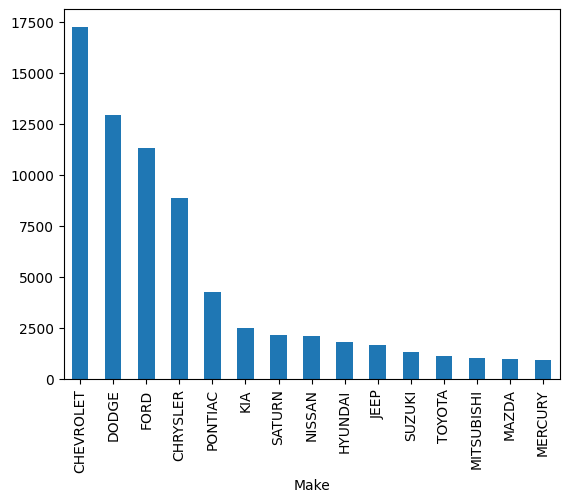

In [ ]:
df['Make'].value_counts().plot(kind='bar')

In [ ]:
df=df[df.groupby('Make').Make.transform('count')>900].copy()

In [ ]:
df.sample(5)

,IsBadBuy,PurchDate,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Size,TopThreeAmericanName,AUCGUART,BYRNO,VehBCost,IsOnlineSale,WarrantyCost
72440,0,2/18/2009,2004,5,DODGE,STRATUS 4C 2.4L I4 M,SE,4D SEDAN,PURPLE,AUTO,Covers,84250,MEDIUM,CHRYSLER,GREEN,18881,4900.0,0,1243
60878,0,3/11/2010,2005,5,DODGE,1500 RAM PICKUP 2WD,SLT,QUAD CAB 4.7L SLT,GOLD,AUTO,Alloy,74016,LARGE TRUCK,CHRYSLER,GREEN,19638,9170.0,0,920
51804,0,8/11/2010,2007,3,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,SILVER,AUTO,Alloy,89595,LARGE,FORD,GREEN,3453,6715.0,0,1633
36014,0,5/19/2009,2007,2,FORD,ESCAPE 4WD V6 3.0L V,XLT,4D CUV 3.0L XLT,BEIGE,AUTO,Covers,79624,SMALL SUV,FORD,GREEN,8655,7520.0,0,1389
64438,0,6/16/2010,2004,6,CHRYSLER,SEBRING 4C,LX,4D SEDAN,WHITE,AUTO,Alloy,60774,MEDIUM,CHRYSLER,GREEN,21053,5845.0,0,1020


In [ ]:
df.shape


(70147, 19)

<Axes: xlabel='Model'>

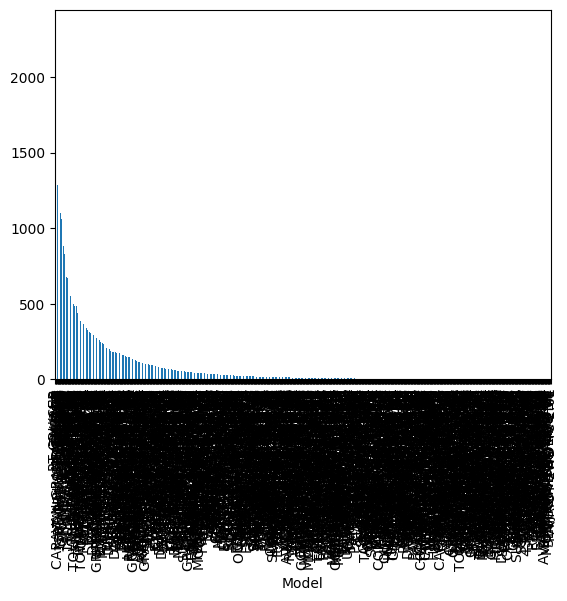

In [ ]:
df['Model'].value_counts().plot(kind='bar')

<Axes: xlabel='Trim'>

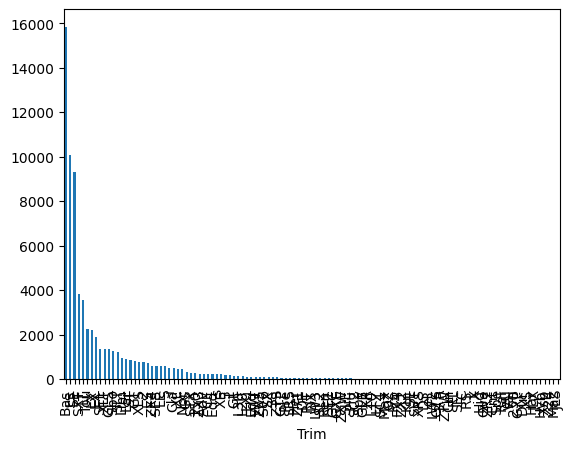

In [ ]:
df['Trim'].value_counts().plot(kind='bar')

<Axes: xlabel='SubModel'>

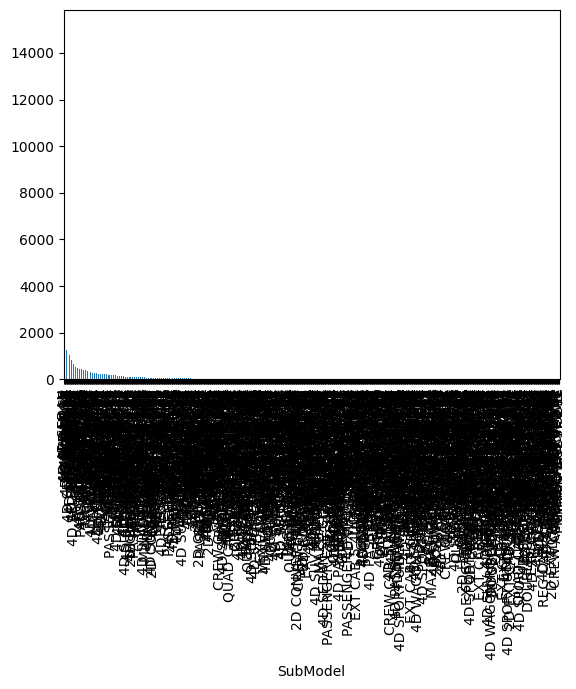

In [ ]:
df['SubModel'].value_counts().plot(kind='bar')

<Axes: xlabel='Color'>

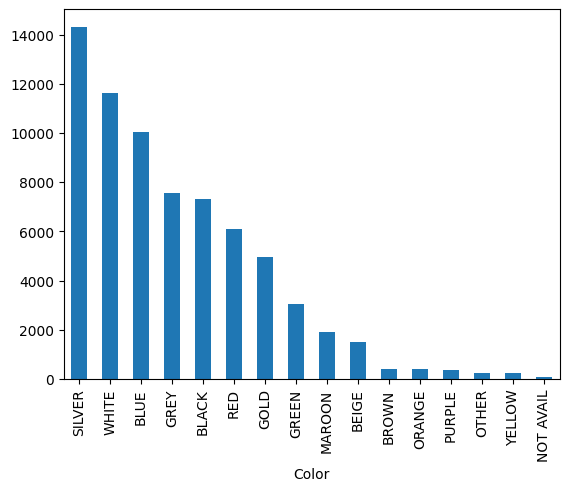

In [ ]:
df['Color'].value_counts().plot(kind='bar')

<Axes: xlabel='Transmission'>

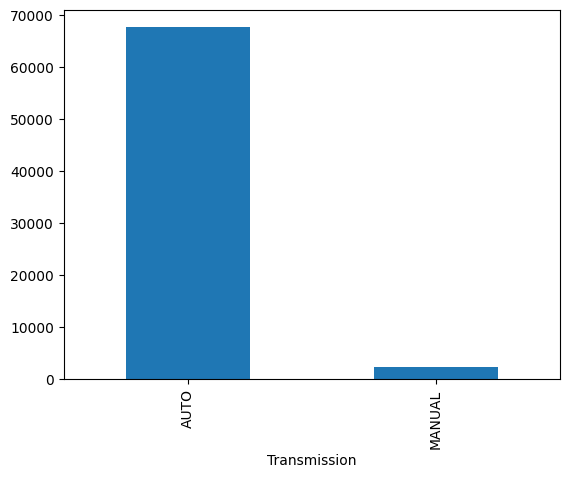

In [ ]:
df['Transmission'].value_counts().plot(kind='bar')

<Axes: xlabel='WheelType'>

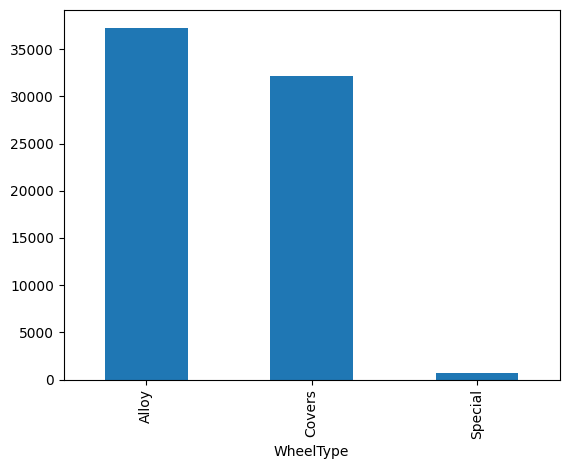

In [ ]:
df['WheelType'].value_counts().plot(kind='bar')

<Axes: xlabel='Size'>

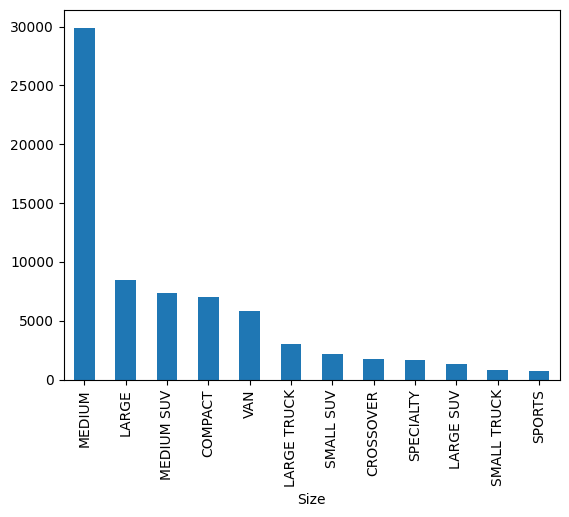

In [ ]:
df['Size'].value_counts().plot(kind='bar')

<Axes: xlabel='TopThreeAmericanName'>

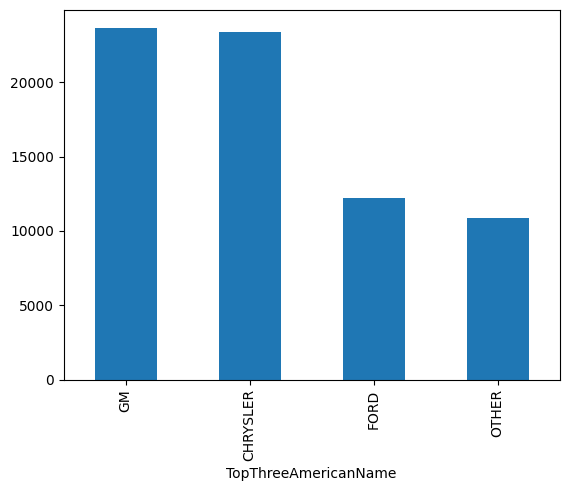

In [ ]:
df['TopThreeAmericanName'].value_counts().plot(kind='bar')

<Axes: xlabel='AUCGUART'>

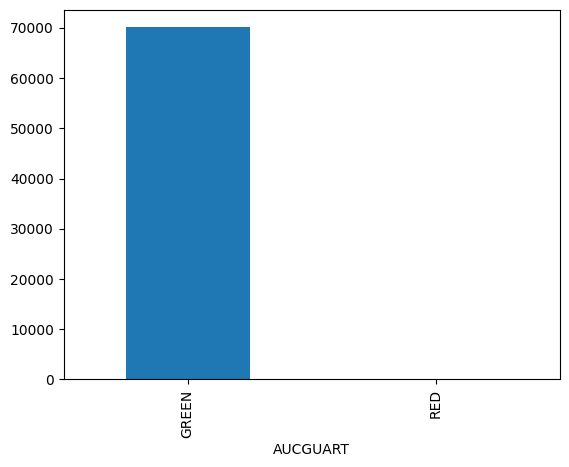

In [ ]:
df['AUCGUART'].value_counts().plot(kind='bar')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70147 entries, 0 to 72981
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   IsBadBuy              70147 non-null  category
 1   PurchDate             70147 non-null  object  
 2   VehYear               70147 non-null  int64   
 3   VehicleAge            70147 non-null  int64   
 4   Make                  70147 non-null  object  
 5   Model                 70147 non-null  object  
 6   Trim                  70147 non-null  object  
 7   SubModel              70147 non-null  object  
 8   Color                 70147 non-null  object  
 9   Transmission          70147 non-null  object  
 10  WheelType             70147 non-null  object  
 11  VehOdo                70147 non-null  int64   
 12  Size                  70147 non-null  object  
 13  TopThreeAmericanName  70147 non-null  object  
 14  AUCGUART              70147 non-null  object  
 15  BYRNO  

In [ ]:
df['IsBadBuy'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_badbuy = LabelEncoder()

In [ ]:
df['IsBadBuy'] = le_badbuy.fit_transform(df['IsBadBuy'])
df['IsBadBuy'].unique()

array([0, 1])

In [ ]:
df['PurchDate'].unique()

array(['12/7/2009', '12/14/2009', '12/21/2009', '12/28/2009', '1/4/2010',
       '1/11/2010', '1/18/2010', '1/25/2010', '2/1/2010', '2/8/2010',
       '2/15/2010', '2/22/2010', '3/1/2010', '3/8/2010', '3/15/2010',
       '3/22/2010', '3/29/2010', '4/5/2010', '4/12/2010', '4/19/2010',
       '4/26/2010', '5/3/2010', '5/10/2010', '5/17/2010', '5/24/2010',
       '6/2/2010', '9/27/2010', '10/4/2010', '10/11/2010', '10/18/2010',
       '10/25/2010', '11/1/2010', '11/8/2010', '11/15/2010', '11/22/2010',
       '11/29/2010', '12/6/2010', '12/13/2010', '12/20/2010', '2/18/2009',
       '8/19/2009', '8/26/2009', '9/2/2009', '9/9/2009', '9/16/2009',
       '9/23/2009', '9/30/2009', '10/7/2009', '2/24/2010', '3/3/2010',
       '3/10/2010', '3/17/2010', '3/24/2010', '3/25/2010', '3/31/2010',
       '4/14/2010', '4/28/2010', '5/12/2010', '6/9/2010', '6/16/2010',
       '6/23/2010', '6/30/2010', '7/7/2010', '7/14/2010', '7/21/2010',
       '8/4/2010', '8/11/2010', '8/18/2010', '8/25/2010', '9/1/201

In [ ]:
le_PurchDate = LabelEncoder()

In [ ]:
df['PurchDate'] = le_PurchDate.fit_transform(df['PurchDate'])
df['PurchDate'].unique()

array([164, 132, 144, 152,  31,   1,  11,  21, 170, 208, 178, 191, 211,
       253, 219, 231, 241, 291, 259, 269, 281, 331, 301, 311, 321, 359,
       500,  74,  43,  53,  64,  84, 123,  92, 104, 112, 163, 131, 143,
       183, 444, 455, 488, 515, 483, 495, 507,  79, 195, 243, 213, 223,
       235, 237, 247, 263, 285, 305, 384, 352, 364, 376, 425, 392, 404,
       466, 433, 443, 454, 474, 514, 482, 494, 504,  47,  58,  68, 114,
        86,  96, 403, 413, 465, 432, 442, 453, 473, 513, 493, 503,  77,
        46,  57,  67, 113,  85,  95, 166, 134, 146,  33,   3,  13,  23,
       188, 210, 180, 193, 229, 255, 221, 233, 245, 293, 261, 273, 283,
       333, 303, 313, 323, 382, 350, 362, 372, 423,  88,  98, 106, 108,
       142, 169, 133, 137,  76,  45,  55,  66, 102, 125,  94, 116, 165,
       242, 212, 222, 234, 246, 294, 262, 284, 304, 324, 383, 361, 363,
        87, 156, 130, 148, 158, 202, 172, 182,  78, 127, 167, 499,  30,
       207, 177, 189, 200, 252, 230, 240, 288, 258, 299, 267, 27

In [ ]:
df['Make'].unique()

array(['MAZDA', 'DODGE', 'FORD', 'MITSUBISHI', 'KIA', 'NISSAN',
       'CHEVROLET', 'SATURN', 'CHRYSLER', 'MERCURY', 'HYUNDAI', 'TOYOTA',
       'PONTIAC', 'SUZUKI', 'JEEP'], dtype=object)

In [ ]:
le_Make = LabelEncoder()

In [ ]:
df['Make'] = le_Make.fit_transform(df['Make'])
df['Make'].unique()

array([ 7,  2,  3,  9,  6, 10,  0, 12,  1,  8,  4, 14, 11, 13,  5])

In [ ]:
df['Model'].unique()

array(['MAZDA3', '1500 RAM PICKUP 2WD', 'STRATUS V6', 'NEON', 'FOCUS',
       'GALANT 4C', 'SPECTRA', 'TAURUS', 'FIVE HUNDRED',
       'F150 PICKUP 2WD V6', 'CARAVAN GRAND FWD V6', 'ALTIMA',
       'CAVALIER 4C', 'TRAILBLAZER 2WD 6C', 'VUE 2WD 4C', 'IMPALA',
       'VOYAGER FWD V6', 'MONTE CARLO', 'VENTURE FWD V6', 'HHR', 'SABLE',
       'DURANGO 4WD V8', 'SUBURBAN 1500 2WD', 'EXPLORER 2WD V6', '300',
       'MUSTANG V6', 'AVALANCHE 1500 2WD V', 'WINDSTAR FWD V6',
       'FREESTAR FWD V6', 'SONATA V6', 'CALIBER', 'SENTRA',
       'PACIFICA FWD', 'IMPALA V6', 'XTERRA 2WD V6', 'COROLLA', 'G6 V6',
       'ION', 'DURANGO 2WD V8', 'FUSION 4C', '4 RUNNER 2WD V8',
       'GRAND PRIX', 'SEBRING V6', 'FORENZA', 'MAZDA5', 'LIBERTY 2WD V6',
       'DAKOTA PICKUP 2WD V6', 'TAHOE 2WD', 'COBALT', 'EXPEDITION 2WD V8',
       'SUNFIRE', 'RELAY 2WD V6', 'FREESTYLE 2WD V6',
       'F150 PICKUP 2WD V8', 'TRAILBLAZER EXT 2WD', 'PT CRUISER',
       'TRACKER 2WD V6', 'DURANGO 2WD V6', 'MALIBU V6',
       'T

In [ ]:
le_Model = LabelEncoder()

In [ ]:
df['Model'] = le_Model.fit_transform(df['Model'])
df['Model'].unique()

array([448,   0, 692, 517, 271, 315, 672, 717, 268, 254, 122,  44, 124,
       748, 803, 362, 801, 479, 782, 348, 612, 189, 697, 244,   8, 510,
        65, 815, 289, 663,  92, 644, 540, 372, 833, 165, 310, 380, 185,
       300,  24, 337, 635, 286, 455, 406, 179, 711, 140, 238, 703, 582,
       292, 256, 754, 565, 742, 183, 426, 739, 110, 412, 220, 688, 404,
       457,  97, 296, 391, 586, 630, 230, 526, 577, 306,  33, 777, 210,
         2, 215,  55, 763, 248, 226, 119, 756, 659, 223, 424, 144, 623,
       332, 418,  78, 133,  73, 590, 555, 670, 389,  60,  75, 758, 260,
       302, 213, 790, 737, 130, 789, 615, 541, 365, 142, 671, 779, 780,
       243, 747, 429, 513, 410, 363, 134, 722,   9, 481, 413, 386,  82,
       632, 421, 269, 425, 634, 664, 211, 433, 637, 752, 568, 212, 127,
        48, 350, 691, 340, 569, 690, 566, 627, 199, 329, 665,  91, 219,
       288, 164, 385, 783, 382, 650, 715, 680, 191, 427, 816,  50, 538,
       661, 793, 459, 249, 272, 227, 811,  36, 528, 278, 480, 29

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70147 entries, 0 to 72981
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   IsBadBuy              70147 non-null  int64   
 1   PurchDate             70147 non-null  int64   
 2   VehYear               70147 non-null  int64   
 3   VehicleAge            70147 non-null  int64   
 4   Make                  70147 non-null  int64   
 5   Model                 70147 non-null  int64   
 6   Trim                  70147 non-null  object  
 7   SubModel              70147 non-null  object  
 8   Color                 70147 non-null  object  
 9   Transmission          70147 non-null  object  
 10  WheelType             70147 non-null  object  
 11  VehOdo                70147 non-null  int64   
 12  Size                  70147 non-null  object  
 13  TopThreeAmericanName  70147 non-null  object  
 14  AUCGUART              70147 non-null  object  
 15  BYRNO  

In [ ]:
df['Trim'].unique()

array(['i', 'ST', 'SXT', 'ZX3', 'ES', 'EX', 'SE', 'SEL', 'XL', 'Bas',
       'LS', 'SS', 'SLT', '150', 'Spo', 'LX', 'GLS', 'CE', 'GT', 'Lar',
       '2', 'Adv', 'SR5', 'GXP', 'Tou', 'XLT', 'LT', 'SES', 'XLS', 'LE',
       '1', 'L20', 'Lim', 's', 'Edd', '3', 'Edg', 'ZTW', 'ZX4', 'GL',
       'STX', 'Nor', 'GS', 'XE', 'Ren', 'LTZ', 'ZTS', 'S', 'GTC', 'GTP',
       'Cla', 'Spy', 'LXi', 'SE-', 'Pre', 'SL2', 'GXE', 'SL1', 'GLE',
       'DE', 'Z71', 'SLE', 'SX', 'XR', 'SVT', 'GTS', 'LW3', 'SV6', 'eL',
       'DX', 'Val', 'Spe', 'W/T', 'LW2', 'Pro', 'L30', 'RT', 'Cin', 'Max',
       'Ral', 'R/T', 'Her', 'ZX5', 'Xsp', 'Kin', '3 R', 'RS', 'Plu', 'DS',
       'Ove', 'XRS', 'SC2', 'SC1', 'XS', 'C', 'ZX2', 'ZXW', 'ZR2', 'Dur',
       'OZ', 'L', '250', 'eC', 'FX4', 'L10', 'SL', 'X', 'Maz', 'Ent',
       'Hig', 'Z24', 'Har', 'Hyb', 'JLX', 'JLS'], dtype=object)

In [ ]:
le_Trim = LabelEncoder()

In [ ]:
df['Trim'] = le_Trim.fit_transform(df['Trim'])
df['Trim'].unique()

array([113,  80,  85, 107,  16,  17,  69,  71,  94,   7,  44,  79,  77,
         1,  87,  49,  24,   9,  26,  51,   2,   6,  78,  31,  89,  96,
        45,  72,  95,  43,   0,  41,  52, 114,  18,   4,  19, 105, 108,
        22,  81,  55,  25,  93,  65,  46, 104,  66,  27,  28,  11,  88,
        50,  70,  59,  75,  30,  74,  23,  12, 102,  76,  84,  97,  83,
        29,  48,  82, 112,  14,  90,  86,  91,  47,  60,  42,  63,  10,
        53,  64,  61,  33, 109, 100,  38,   5,  62,  58,  13,  57,  98,
        68,  67,  99,   8, 106, 110, 103,  15,  56,  39,   3, 111,  21,
        40,  73,  92,  54,  20,  34, 101,  32,  35,  37,  36])

In [ ]:
df['SubModel'].unique()

array(['4D SEDAN I', 'QUAD CAB 4.7L SLT', '4D SEDAN SXT FFV', '4D SEDAN',
       '2D COUPE ZX3', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE',
       '4D SEDAN SEL', 'REG CAB 4.2L XL', 'MINIVAN 3.3L', 'MINIVAN 3.8L',
       '2D COUPE', '4D SUV 4.2L', '4D CUV 2.2L', '2D COUPE SS',
       'PASSENGER 3.4L', '4D SUV 2.2L LS', '4D SEDAN LS PREMIUM',
       '4D SUV 5.7L SLT', 'MINIVAN 3.8L SXT', '4D UTILITY 5.3L FFV LS',
       '2D SUV 4.0L SPORT', '4D SUV-PICKUP 5.3L', 'PASSENGER 3.8L LX',
       'PASSENGER 3.9L LX', '4D WAGON SXT', '4D SEDAN 1.8',
       '4D SPORT TOURER', '4D SEDAN LS 3.5L FFV', 'QUAD CAB 5.7L',
       '4D SPORT UTILITY', '4D SEDAN CE', '4D SEDAN GT', 'QUAD CAB 4.7L',
       '4D SEDAN LEVEL 2', '4D SUV 4.7L', '4D SUV 4.7L ADVENTURER',
       '4D SEDAN GLS', '4D SPORT UTILITY SPORT EDITION', '4D SEDAN GXP',
       '4D WAGON SPORT', '4D SUV', 'QUAD CAB 3.7L ST', '4D SUV 5.3L',
       '4D SEDAN LS', '4D SUV 4.6L XLT', '4D SUV 4.7L ST',
       '4D SUV 2.2L LT', '4D SEDAN SES',

In [ ]:
le_SubModel = LabelEncoder()

In [ ]:
df['SubModel'] = le_SubModel.fit_transform(df['SubModel'])
df['SubModel'].unique()

array([169, 645, 231, 128,  32, 151, 153, 206, 215, 693, 584, 597,  10,
       322,  78,  27, 607, 290, 185, 362, 605, 388,  63, 383, 612, 616,
       430, 129, 250, 181, 649, 252, 147, 160, 638, 174, 331, 332, 157,
       278, 167, 428, 287, 634, 346, 179, 330, 341, 291, 219,  87, 476,
       323, 373, 652, 303, 329, 641, 591, 172, 722, 377, 380, 173,  86,
       170, 375, 394, 438, 327, 354, 679,  89, 175,  41, 431,  18, 338,
       625, 542, 314, 269, 218, 210, 724, 251, 245, 155, 188,  75, 205,
       509, 626, 672, 589, 262, 189, 691, 213, 420,  80,  25, 243, 669,
        82, 405, 208, 196, 595, 695, 136, 249, 230, 158, 372, 187, 259,
       275, 235, 698, 274, 533, 379, 594, 233,   5, 193, 610,  83, 242,
       112, 313, 604, 305, 529,   3, 191, 574, 121, 164, 186, 622, 356,
       135, 148, 300,   9, 232,  61, 378, 197, 620, 212, 603, 547, 344,
       163, 271,  19, 321,  88,  11, 201, 361, 579, 176, 223, 123, 166,
       152, 364, 546, 613, 222, 631, 258, 194, 657, 220, 464, 14

In [ ]:
df['Color'].unique()

array(['RED', 'WHITE', 'MAROON', 'SILVER', 'BLACK', 'GOLD', 'GREY',
       'BLUE', 'BEIGE', 'PURPLE', 'ORANGE', 'GREEN', 'YELLOW', 'BROWN',
       'NOT AVAIL', 'OTHER'], dtype=object)

In [ ]:
le_Color = LabelEncoder()

In [ ]:
df['Color'] = le_Color.fit_transform(df['Color'])
df['Color'].unique()

array([12, 14,  7, 13,  1,  4,  6,  2,  0, 11,  9,  5, 15,  3,  8, 10])

In [ ]:
df['Transmission'].unique()

array(['AUTO', 'MANUAL'], dtype=object)

In [ ]:
le_Transmission = LabelEncoder()

In [ ]:
df['Transmission'] = le_Transmission.fit_transform(df['Transmission'])
df['Transmission'].unique()

array([0, 1])

In [ ]:
df['WheelType'].unique()

array(['Alloy', 'Covers', 'Special'], dtype=object)

In [ ]:
le_WheelType = LabelEncoder()

In [ ]:
df['WheelType'] = le_WheelType.fit_transform(df['WheelType'])
df['WheelType'].unique()

array([0, 1, 2])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70147 entries, 0 to 72981
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   IsBadBuy              70147 non-null  int64   
 1   PurchDate             70147 non-null  int64   
 2   VehYear               70147 non-null  int64   
 3   VehicleAge            70147 non-null  int64   
 4   Make                  70147 non-null  int64   
 5   Model                 70147 non-null  int64   
 6   Trim                  70147 non-null  int64   
 7   SubModel              70147 non-null  int64   
 8   Color                 70147 non-null  int64   
 9   Transmission          70147 non-null  int64   
 10  WheelType             70147 non-null  int64   
 11  VehOdo                70147 non-null  int64   
 12  Size                  70147 non-null  object  
 13  TopThreeAmericanName  70147 non-null  object  
 14  AUCGUART              70147 non-null  object  
 15  BYRNO  

In [ ]:
df['Size'].unique()

array(['MEDIUM', 'LARGE TRUCK', 'COMPACT', 'LARGE', 'VAN', 'MEDIUM SUV',
       'LARGE SUV', 'SPECIALTY', 'SPORTS', 'CROSSOVER', 'SMALL SUV',
       'SMALL TRUCK'], dtype=object)

In [ ]:
le_Size = LabelEncoder()

In [ ]:
df['Size'] = le_Size.fit_transform(df['Size'])
df['Size'].unique()

array([ 5,  4,  0,  2, 11,  6,  3,  9, 10,  1,  7,  8])

In [ ]:
df['TopThreeAmericanName'].unique()

array(['OTHER', 'CHRYSLER', 'FORD', 'GM'], dtype=object)

In [ ]:
le_TopThreeAmericanName = LabelEncoder()

In [ ]:
df['TopThreeAmericanName'] = le_TopThreeAmericanName.fit_transform(df['TopThreeAmericanName'])
df['TopThreeAmericanName'].unique()

array([3, 0, 1, 2])

In [ ]:
df['AUCGUART'].unique()

array(['GREEN', 'RED'], dtype=object)

In [ ]:
le_AUCGUART = LabelEncoder()

In [ ]:
df['AUCGUART'] = le_AUCGUART.fit_transform(df['AUCGUART'])
df['AUCGUART'].unique()

array([0, 1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70147 entries, 0 to 72981
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IsBadBuy              70147 non-null  int64  
 1   PurchDate             70147 non-null  int64  
 2   VehYear               70147 non-null  int64  
 3   VehicleAge            70147 non-null  int64  
 4   Make                  70147 non-null  int64  
 5   Model                 70147 non-null  int64  
 6   Trim                  70147 non-null  int64  
 7   SubModel              70147 non-null  int64  
 8   Color                 70147 non-null  int64  
 9   Transmission          70147 non-null  int64  
 10  WheelType             70147 non-null  int64  
 11  VehOdo                70147 non-null  int64  
 12  Size                  70147 non-null  int64  
 13  TopThreeAmericanName  70147 non-null  int64  
 14  AUCGUART              70147 non-null  int64  
 15  BYRNO                 70

In [ ]:
df['IsOnlineSale'].unique()

array([0, 1])

In [ ]:
le_IsOnlineSale = LabelEncoder()

In [ ]:
df['IsOnlineSale'] = le_IsOnlineSale.fit_transform(df['IsOnlineSale'])
df['IsOnlineSale'].unique()

array([0, 1])

In [107]:
df.head()

,IsBadBuy,PurchDate,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Size,TopThreeAmericanName,AUCGUART,BYRNO,VehBCost,IsOnlineSale,WarrantyCost
0,0,164,2006,3,7,448,113,169,12,0,0,89046,5,3,0,21973,7100.0,0,1113
1,0,164,2004,5,2,0,80,645,14,0,0,93593,4,0,0,19638,7600.0,0,1053
2,0,164,2005,4,2,692,85,231,7,0,1,73807,5,0,0,19638,4900.0,0,1389
3,0,164,2004,5,2,517,85,128,13,0,0,65617,0,0,0,19638,4100.0,0,630
4,0,164,2005,4,3,271,107,32,13,1,1,69367,0,1,0,19638,4000.0,0,1020


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70147 entries, 0 to 72981
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IsBadBuy              70147 non-null  int64  
 1   PurchDate             70147 non-null  int64  
 2   VehYear               70147 non-null  int64  
 3   VehicleAge            70147 non-null  int64  
 4   Make                  70147 non-null  int64  
 5   Model                 70147 non-null  int64  
 6   Trim                  70147 non-null  int64  
 7   SubModel              70147 non-null  int64  
 8   Color                 70147 non-null  int64  
 9   Transmission          70147 non-null  int64  
 10  WheelType             70147 non-null  int64  
 11  VehOdo                70147 non-null  int64  
 12  Size                  70147 non-null  int64  
 13  TopThreeAmericanName  70147 non-null  int64  
 14  AUCGUART              70147 non-null  int64  
 15  BYRNO                 70

In [109]:
#defining input columns
X = df[['PurchDate','VehYear','VehicleAge','Make','Model','Trim','SubModel','Color','Transmission','WheelType','VehOdo','Size','TopThreeAmericanName','AUCGUART','BYRNO','VehBCost','IsOnlineSale','WarrantyCost']]
X

,PurchDate,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Size,TopThreeAmericanName,AUCGUART,BYRNO,VehBCost,IsOnlineSale,WarrantyCost
0,164,2006,3,7,448,113,169,12,0,0,89046,5,3,0,21973,7100.0,0,1113
1,164,2004,5,2,0,80,645,14,0,0,93593,4,0,0,19638,7600.0,0,1053
2,164,2005,4,2,692,85,231,7,0,1,73807,5,0,0,19638,4900.0,0,1389
3,164,2004,5,2,517,85,128,13,0,0,65617,0,0,0,19638,4100.0,0,630
4,164,2005,4,3,271,107,32,13,1,1,69367,0,1,0,19638,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72977,141,2001,8,8,612,25,158,1,0,0,45234,5,1,0,18111,4200.0,0,993
72978,141,2007,2,0,418,44,179,13,0,0,71759,5,2,0,18881,6200.0,0,1038
72979,141,2005,4,5,332,51,405,13,0,0,88500,6,0,0,18111,8200.0,0,1893
72980,141,2006,3,0,362,44,179,14,0,0,79554,2,2,0,18881,7000.0,0,1974


In [110]:
#Defining the output column
y = df[['IsBadBuy']]
y

,IsBadBuy
0,0
1,0
2,0
3,0
4,0
...,...
72977,1
72978,0
72979,0
72980,0


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [118]:
logisticregr = LogisticRegression()

In [119]:
logisticregr.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
y_pred = logisticregr.predict(X)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [129]:
logisticregr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [130]:
y_pred = logisticregr.predict(X_test)

In [121]:
df.sample()

,IsBadBuy,PurchDate,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Size,TopThreeAmericanName,AUCGUART,BYRNO,VehBCost,IsOnlineSale,WarrantyCost
49356,1,508,2006,4,7,457,114,205,11,0,0,76805,5,3,0,25100,7235.0,0,1506


In [123]:
logisticregr.predict([[481,2005,4,11,91,69,206,4,0,0,84186,2,2,0,8655,5170,0,2412]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [132]:
#checking the accuracy of model
accuracy_score(y_test, y_pred)

0.8785459729151818